In [ ]:
# Mudança exemplo

Dimensão dos dados
Number of Rows: 138779
Number of Columns: 17

Conferindo valores vazios
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                286
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 315
DOL Vehicle ID                                         0
Vehicle Location                                       6
Electric Utility                                      

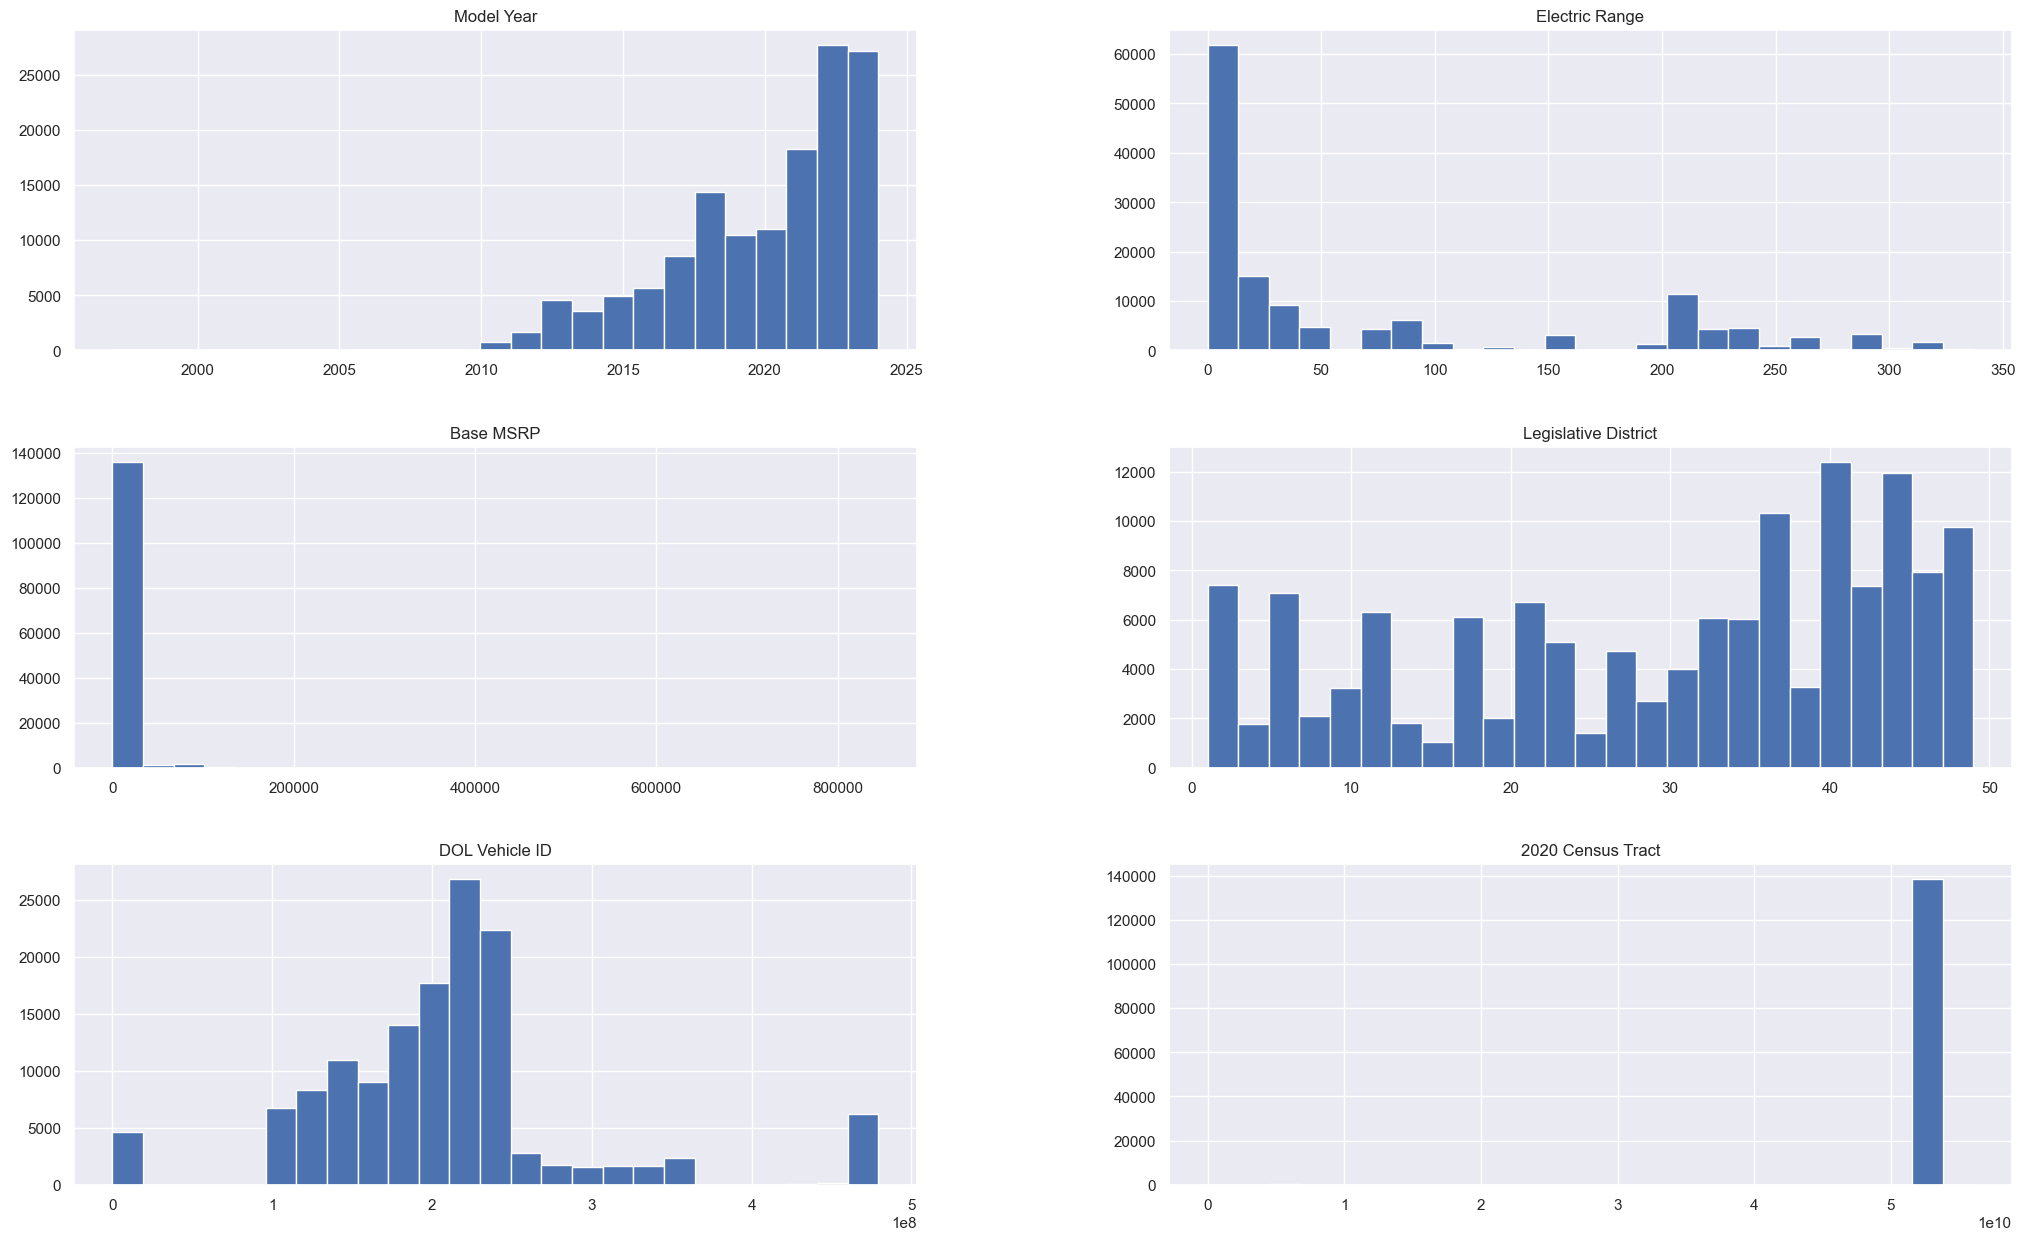

In [2]:
#Importando Pacotes
import pandas  as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

sns.set()
sns.set({'figure.figsize': (25, 15)})

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Lendo os Dados
df = pd.read_csv('C:/Users/GabrielMoretti/Downloads/archive/Electric_Vehicle_Population_Data.csv')

print("Dimensão dos dados")
print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')
print("")
print("Conferindo valores vazios")
print(df.isna().sum())
print("")

print("Arrumando Tipo")
df['Postal Code'] = pd.to_numeric(df['Postal Code'], errors='coerce', downcast='integer')
df['Postal Code'].fillna(-1, inplace=True)
df['Postal Code'] = df['Postal Code'].astype(int)
df['2020 Census Tract'].fillna(-1, inplace=True)
df['2020 Census Tract'] = df['2020 Census Tract'].astype(np.int64)

print(df.dtypes)
print("")
print("Estatistica Descritiva")
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
print(df.describe())
print("")

print("Variaveis Numericas")
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
num_attributes.hist( bins=25 );

Quais são as Marcas que mais produzem


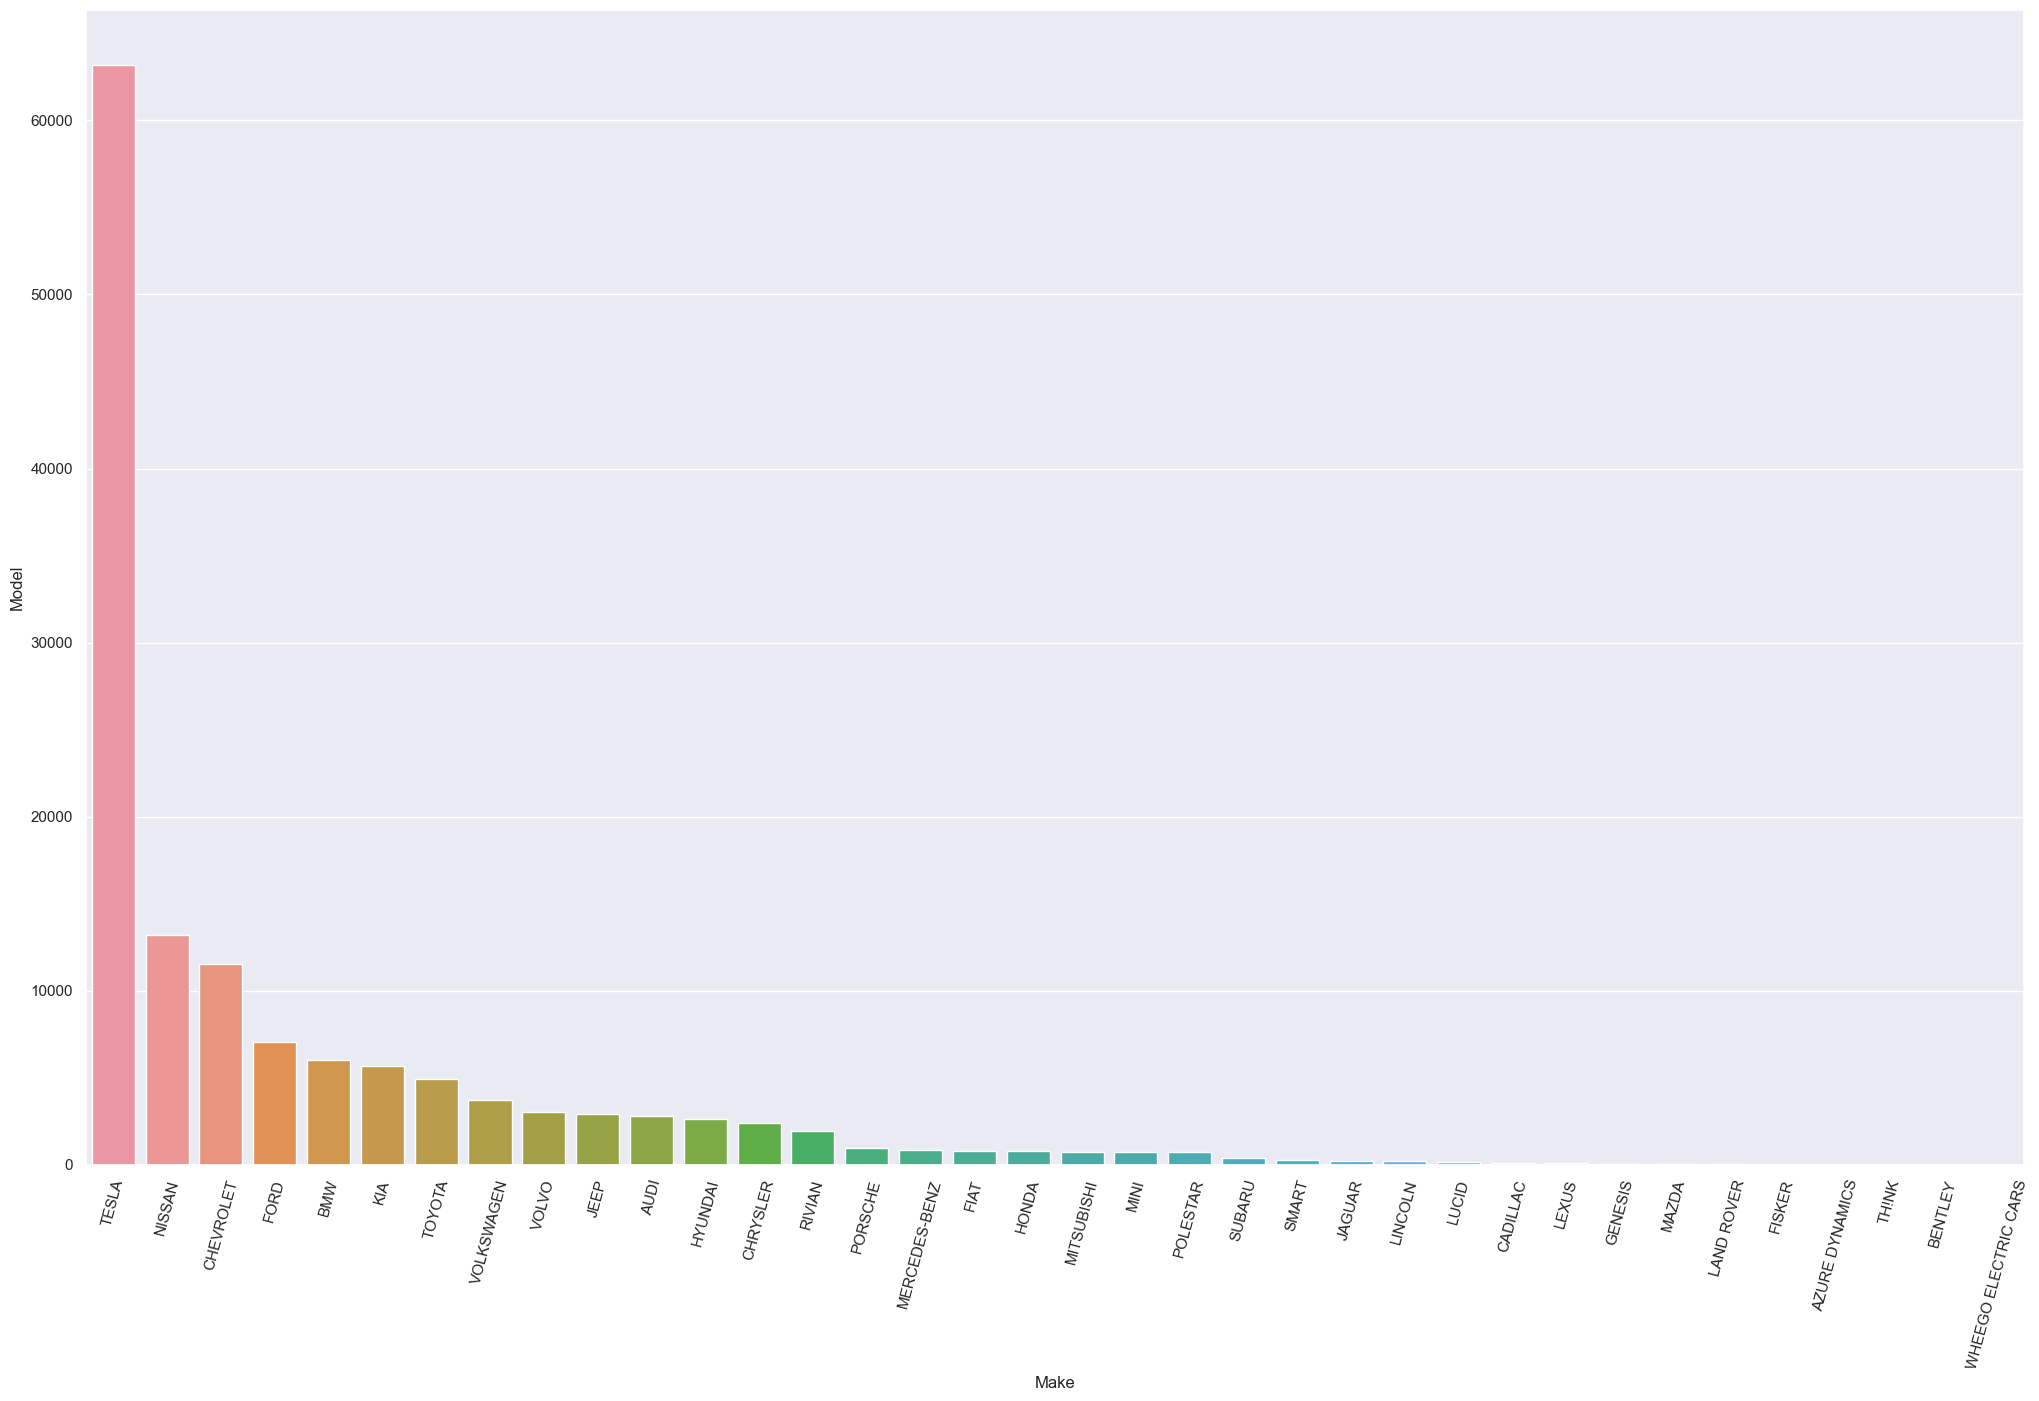

In [8]:
# Analise

print("Quais são as Marcas que mais produzem")
aux1 = df[['Make', 'Model']].groupby('Make').count().sort_values("Model", ascending = False).reset_index()
sns.barplot( x='Make', y='Model', data=aux1 )
plt.xticks(rotation=75);

Quais são os 10 carros mais produzidos


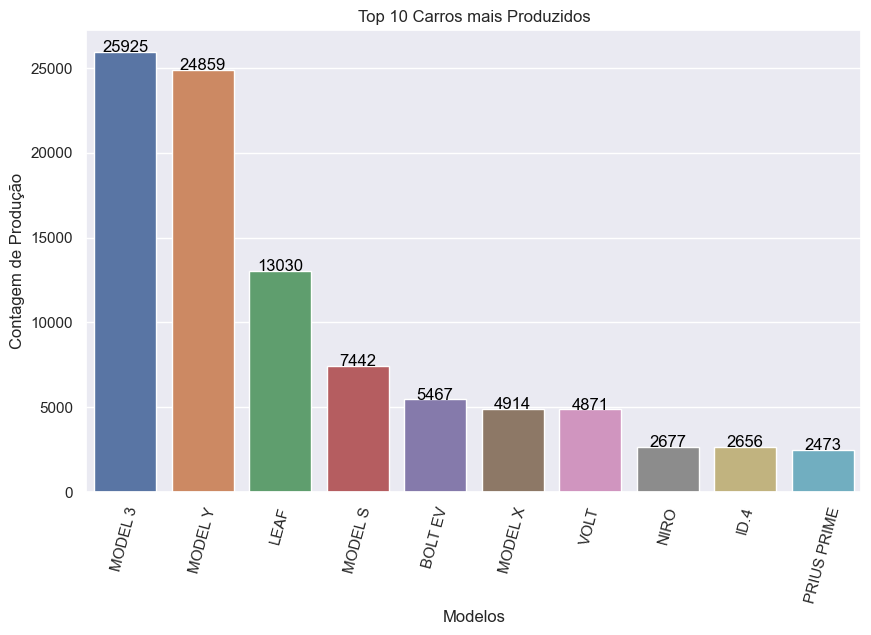

In [20]:
print("Quais são os 10 carros mais produzidos")
aux1 = df[['Make', 'Model']].groupby('Model').count().sort_values("Make", ascending = False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Make', data=aux1)
plt.xticks(rotation=75)
plt.xlabel('Modelos')
plt.ylabel('Contagem de Produção')
plt.title('Top 10 Carros mais Produzidos')

for index, row in aux1.iterrows():
    plt.text(index, row['Make'], row['Make'], color='black', ha="center")

plt.show()


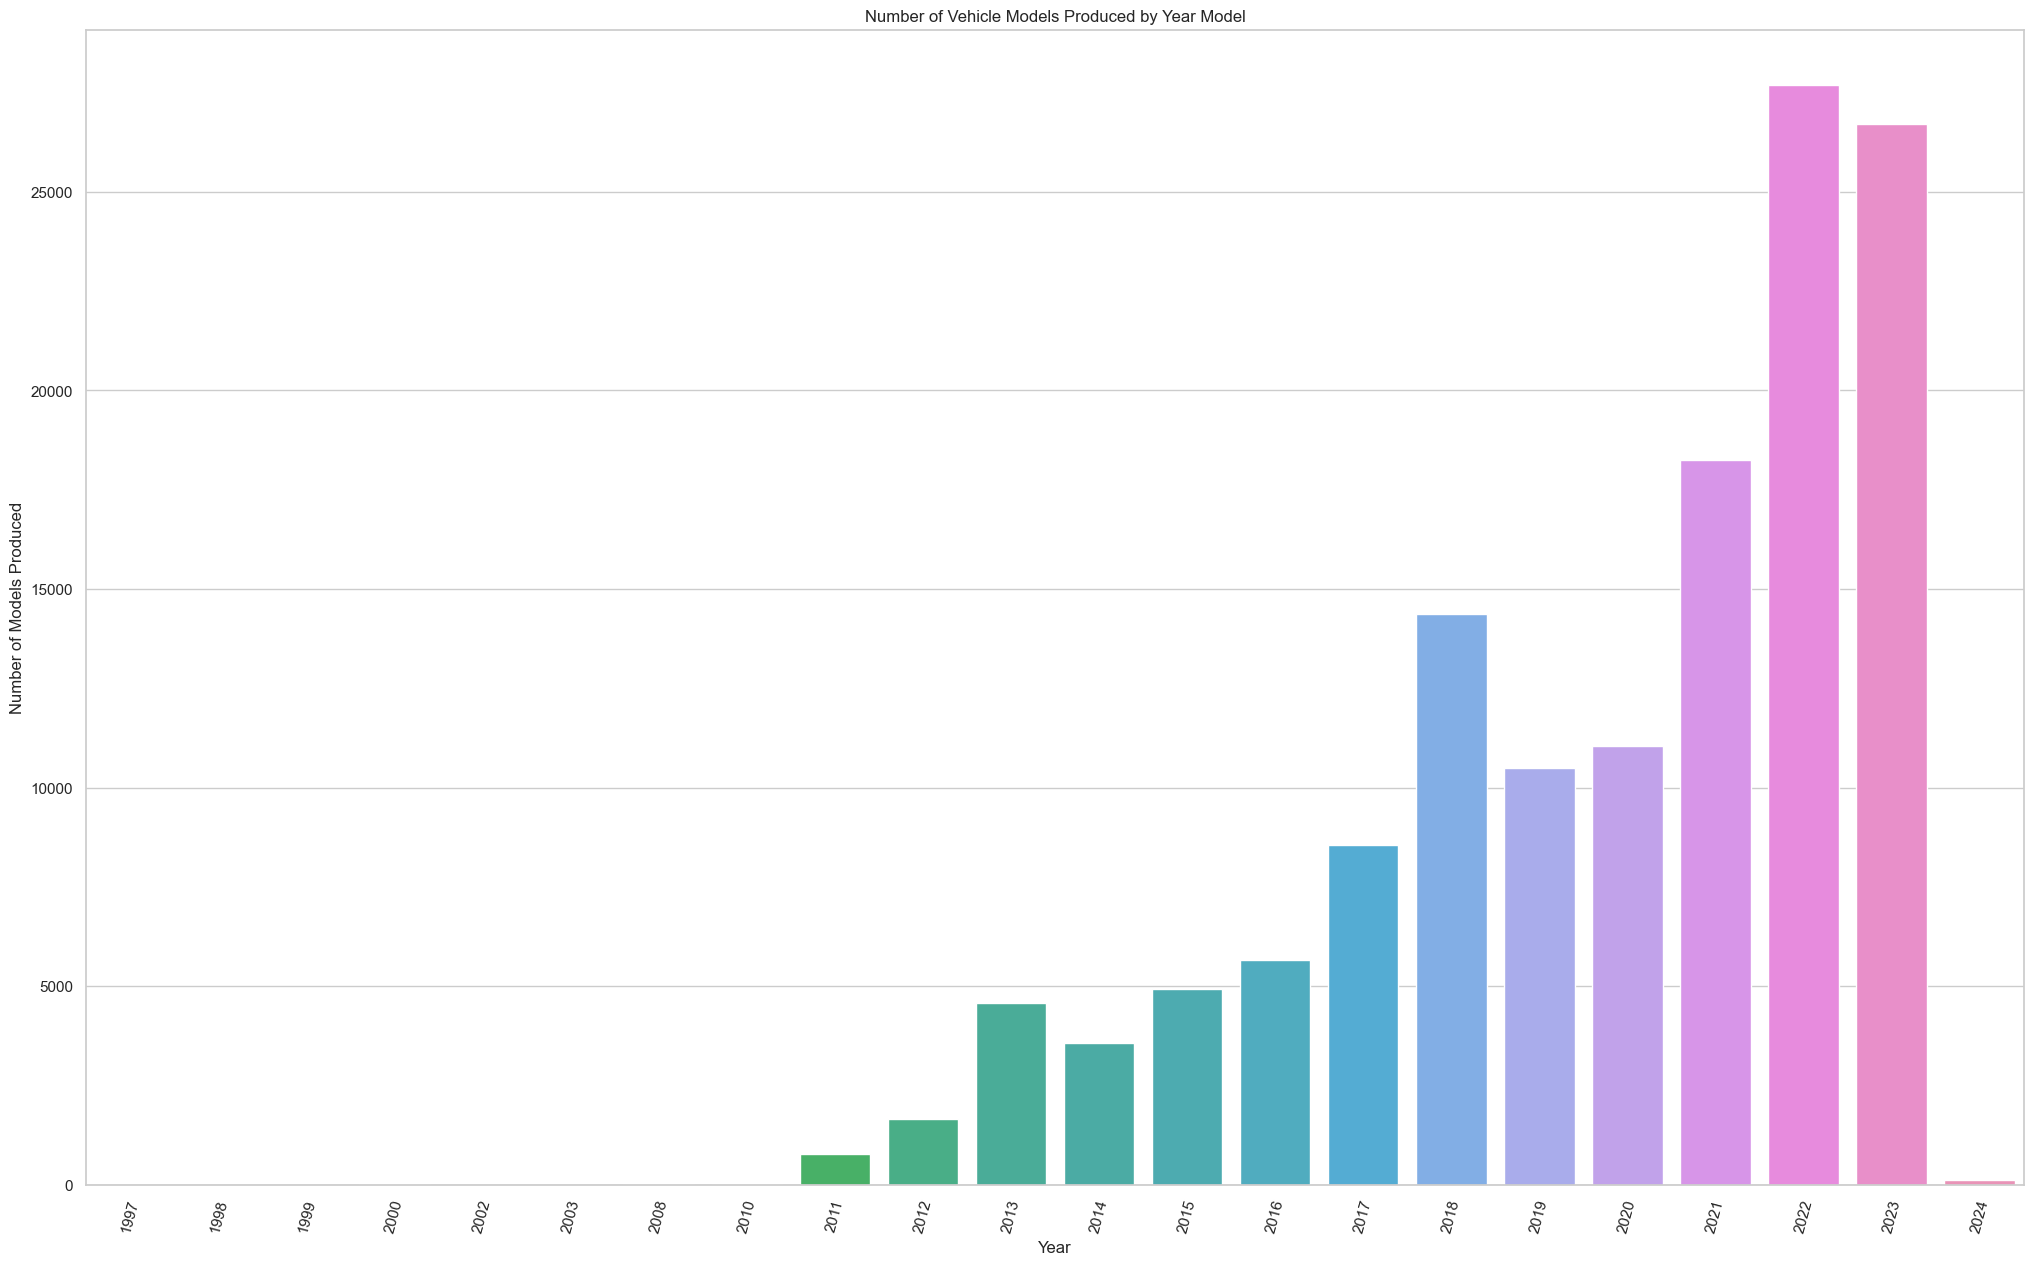

In [41]:
aux1 = df[['Model Year', 'Model']].groupby('Model Year').count().sort_values("Model", ascending=False).reset_index()

# Creating a bar plot using Seaborn
sns.barplot(x='Model Year', y='Model', data=aux1)
plt.xticks(rotation=75)
plt.xlabel('Year')
plt.ylabel('Number of Models Produced')
plt.title('Number of Vehicle Models Produced by Year Model')
plt.show()